# Hitters Veri Seti ile Doğrusal Regresyon Modelleri Kullanılarak Maaş Tahmini

Bu projede doğrusal regresyon modelleri kullanılarak maaş tahmini üzerine bir proje gerçekleştirilecektir. Hitters veri seti hakkında ve doğrusal regresyon modelleri hakkında temel bilgiler verilecektir. Proje beyzbol oyuncularının maaşlarını tahmin edecek bir makine öğrenmesi modeli geliştirmektir. Kullanıcının performanslarına ilişkin bir veri setimiz bulunmaktadır. Veri seti Amerika'da bulunan bir beyzbol liginin 1986 - 1987 sezonunundaki verileri ve bu ligde oynayan oyuncuların verilerini içeren bir veri setidir.

**Doğrusal Regresyon Modelleri:**
- **Basit Doğrusal Regresyon**
- **Doğrusal Regresyon**
- **Ridge Regresyon**
- **Lasso Regresyon**
- **ElasticNet Regresyon**

**1. Bağımlı Değişken:**
- **Salary**: 1986-1987 sezonunda kazanılan maaş

**2. Açıklayıcı Değişkenler:**

Hitters Veri setinde yer alan değişkenlerin açıklanması

- **AtBat**: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
- **Hits**: 1986-1987 sezonundaki isabet sayısı
- **HmRun**: 1986-1987 sezonundaki en değerli vuruş sayısı
- **Runs**: 1986-1987 sezonunda takımına kaç sayı kazandırdı
- **RBI**: Bir vurucunun vuruş yaptıgında kaç tane oyuncuya koşu yaptırdığı.
- **Walks**: Karşı oyuncuya kaç defa hata yaptırdığı
- **Years**: Oyuncunun major liginde kaç sene oynadığı
- **CAtBat**: Oyuncunun kariyeri boyunca kaç kez topa vurduğu
- **CHits**: Oyuncunun kariyeri boyunca kaç kez isabetli vuruş yaptığı
- **CHmRun**: Oyucunun kariyeri boyunca kaç kez en değerli vuruşu yaptığı
- **CRuns**: Oyuncunun kariyeri boyunca takımına kaç tane sayı kazandırdığı
- **CRBI**: Oyuncunun kariyeri boyunca kaç tane oyuncuya koşu yaptırdığı
- **CWalks**: Oyuncun kariyeri boyunca karşı oyuncuya kaç kez hata yaptırdığı
- **League**: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
- **Division**: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
- **PutOuts**: Oyun icinde takım arkadaşınla yardımlaşma
- **Assits**: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
- **Errors**: 1986-1987 sezonundaki oyuncunun hata sayısı
- **Salary**: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)
- **NewLeague**: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

**Gözlem Sayısı: 322**

**Değişken Sayısı: 20**

# 1) Keşifci Veri Analizi

In [1]:
# Gerekli import işlemleri gerçekleştirildi. Doğrusal Regresyon modellerine ait import işlemleri yapıldı.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Veri seti okuma işlemi gerçekleştirildi.
df = pd.read_csv("../input/hitters/Hitters.csv")

In [3]:
# Veri setinin ilk 5 gözlem birimine erişildi.
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# Veri setinin boyutu incelendi. 322 gözlem birimi ve 20 değişkenden oluşmaktadır.
df.shape

(322, 20)

In [5]:
# Veri setinin yapısal bilgilerine ulaşıldı.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
# Değişkenlerdeki eşşiz gözlem sayılarına erişim sağlandı.
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [7]:
# League bir kategorik değişken olduğu için buradaki sınıflardan kaç adet olduğu incelenildi. 
# League değişkeni oyuncunun oynamış olduğu lig hakkında bilgi vermektedir.
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

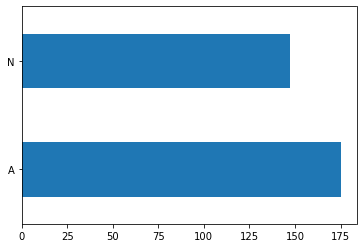

In [8]:
df.League.value_counts().plot.barh();

In [9]:
# NewLeague bir kategorik değişken olduğu için buradaki sınıflardan kaç adet olduğu incelenildi. 
# NewLeague değişkeni oyuncunun 1987 yılında hangi ligde oynayacağı hakkında bilgi vermektedir.
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

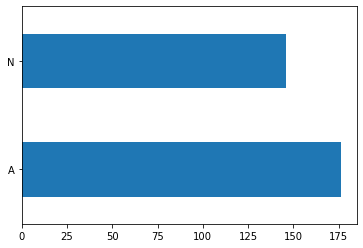

In [10]:
df.NewLeague.value_counts().plot.barh();

In [11]:
# Division bir kategorik değişken olduğu için buradaki sınıflardan kaç adet olduğu incelenildi. 
# Division değişkeni oyuncunun oynadığı pozisyon hakkında bilgi vermektedir.
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

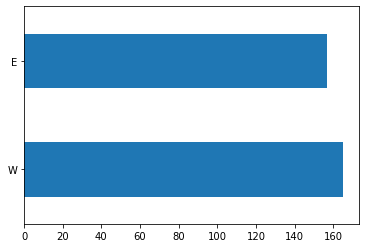

In [12]:
df.Division.value_counts().plot.barh();

In [13]:
# Salary (Maaş) değişkeninin maksimum değerine erişilmiştir. Aynı zamanda bağımlı değişkenimizdir.
df["Salary"].max()

2460.0

In [14]:
# Salary (Maaş) değişkeninin minimum değerine erişilmiştir.
df["Salary"].min()

67.5

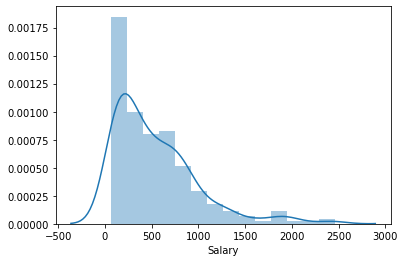

In [15]:
# Salary (Maaş) değişkeninin histogram ve yoğunluk grafiği çizdirilmiştir.
sns.distplot(df.Salary);

In [16]:
# Veri setinin betimsel istatistiklerine erişildi.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [17]:
# Veri setinin korelasyonuna erişim sağlanmıştır. Değişkenler arasında ne tarz bir ilişki olduğu incelenmiştir. 
# Korelasyon değeri > 0 ise pozitif korelasyon bulunmaktadır. Bir değişken değeri artarken diğer değişkenin de değeri artmaktadır.
# Korelasyon = 0 ise korelasyon yoktur anlamına gelmektedir.
# Korelasyon < 0 ise negatif korelasyon bulunmaktadır. Bir değişken artarken diğer değişken azalmaktadır. 
# Korelasyonlar incelendiğinde Salary bağımlı değişkene pozitif korelasyon olarak etkimekte olan 2 değişken bulunmaktadır. 
# Bu değişkenler CRBI ile CRuns değişkenleridir. Bunlar arttıkça Salary (Maaş) değişkeni de artmaktadır.
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


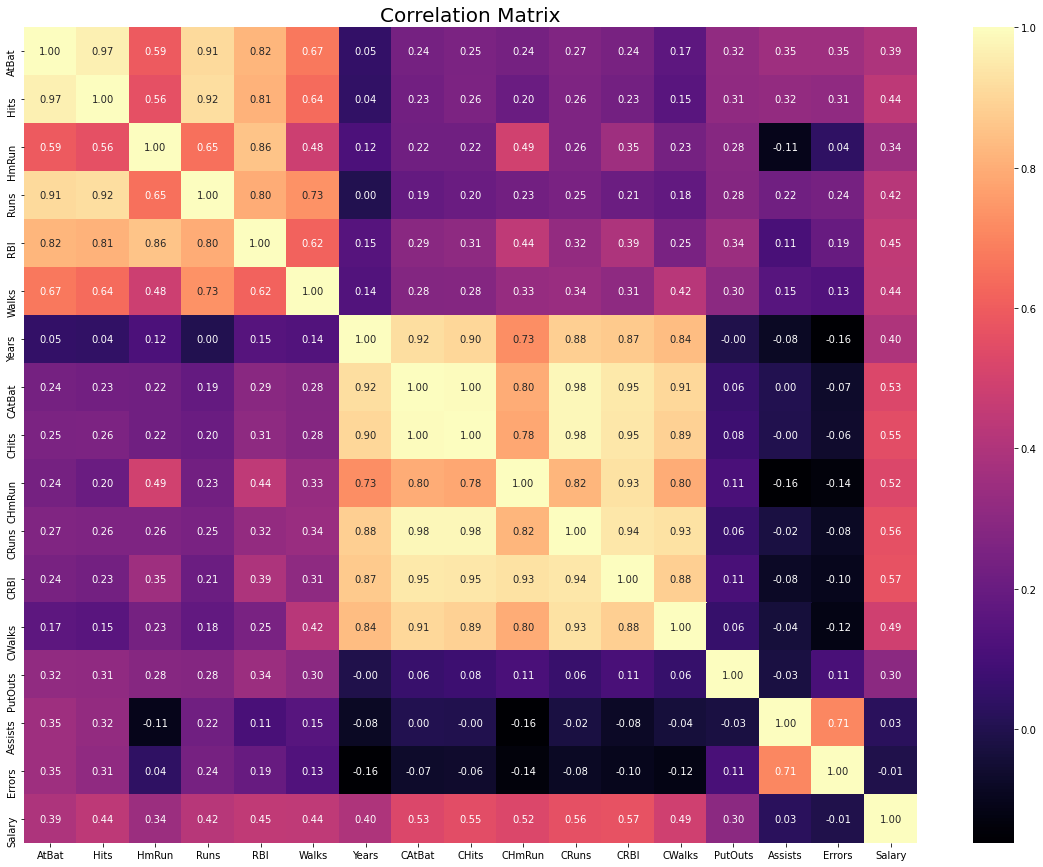

In [18]:
# Veri setinin korelasyon matrisi grafiğine erişim sağlanmıştır.
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [19]:
# League değişkenine göre groupby yapılıp hangi ligde ortalama ne kadar maaş alınmakta bu incelenmiştir.
df.groupby("League").agg({"Salary": "mean"})

,Salary
League,
A,541.999547
N,529.117500


In [20]:
# 1987 yılında oynayacakları yeni liglerde ortalama ne kadar maaş alınmakta bu incelenmiştir.
df.groupby("NewLeague").agg({"Salary": "mean"})

,Salary
NewLeague,
A,537.113028
N,534.553852


In [21]:
# Oyuncunun oynadığı pozisyona göre ortalama ne kadar maaş almakta bu incelenmiştir.
df.groupby("Division").agg({"Salary": "mean"})

,Salary
Division,
E,624.271364
W,450.876873


In [22]:
# Veri setinin korelasyonu incelendiğinde CRBI değişkeni pozitif yönlü korelasyona sahipti. Bu değişken arttıkça Salary değişkeninde artması gerekmektedir.
# Buna dayalı olarak CRBI değişkeni kariyeri boyunca yapmış olduğu vuruş sayısıdır. Buna göre gruplayıp Salary değişkeninin ortalaması incelenmiştir.
df.groupby("CRBI").agg({"Salary": "mean"})

,Salary
CRBI,
0,NaN
3,920.000
4,NaN
7,2127.333
9,70.000
...,...
1299,1450.000
1314,750.000
1348,500.000


In [23]:
# Veri setinin korelasyonu incelendiğinde CRBI değişkeni pozitif yönlü korelasyona sahipti. Bu değişken arttıkça Salary değişkeninde artması gerekmektedir.
# Buna dayalı olarak CRuns değişkeni kariyeri boyunca yapmış olduğu koşu sayısıdır. Buna göre gruplayıp Salary değişkeninin ortalaması incelenmiştir.
df.groupby("CRuns").agg({"Salary": "mean"})

,Salary
CRuns,
1,NaN
2,920.000
3,NaN
6,2127.333
9,NaN
...,...
1172,200.000
1175,535.000
1272,NaN


In [24]:
# League ve Years değişkenlerine göre gruplayıp acaba hangi ligde ve kariyer süresine göre maaş ortalaması nedir?
# Lig ve toplam kariyer yıllarına göre gruplanarak oyuncunun aldıkları maaşların ortalaması nedir? 
df.groupby(["League","Years"]).agg({"Salary": "mean"})

Salary
League Years             
A      1       101.944444
       2       128.055556
       3       178.615385
       4       269.423077
       5       602.147059
       6       630.441176
       7       623.500000
       8       767.395875
       9       894.000000
       10      831.468333
       11      866.666667
       12      516.428571
       13     1104.166667
       14     1019.494286
       15      563.333250
       16      480.000000
       17      686.666667
       18      509.166750
       20      487.500000
N      1       203.312500
       2       283.861083
       3       165.454545
       4       371.833333
       5       507.777778
       6       613.757545
       7       719.166643
       8       462.222333
       9       800.833286
       10      581.666667
       11      817.500000
       12      770.555667
       13     1141.392750
       14      613.333400
       15      652.777667
       16      662.500000
       17      546.666500
       18     1450.000000
       19      500.000000
       20      200.000000
       23             NaN
       24      750.000000

In [25]:
# NewLeague ve Years değişkenlerine göre gruplayıp acaba 1987 oynadığı lig ve kariyer süresine göre maaş ortalaması nedir?
#  Yeni Lig ve toplam kariyer süresine göre gruplanarak oyuncunun aldıkları maaşların ortalaması nedir? 
df.groupby(["NewLeague","Years"]).agg({"Salary": "mean"})

Salary
NewLeague Years             
A         1       191.388889
          2       124.722222
          3       187.250000
          4       265.178571
          5       580.078947
          6       630.441176
          7       590.416667
          8       767.395875
          9       854.000000
          10      837.762000
          11      775.000000
          12      516.428571
          13     1275.000000
          14      912.351429
          15      563.333250
          16      670.000000
          17      686.666667
          18      509.166750
          20      487.500000
N         1       102.687500
          2       286.361083
          3       157.916667
          4       383.392857
          5       540.714286
          6       613.757545
          7       741.794846
          8       462.222333
          9       829.404714
          10      612.857143
          11      896.875000
          12      770.555667
          13     1015.095167
          14      763.333400
          15      652.777667
          16      275.000000
          17      546.666500
          18     1450.000000
          19      500.000000
          20      200.000000
          23             NaN
          24      750.000000

In [26]:
# Oyuncuların oynadıkları pozisyonlara göre aldıkları ortalama maaş nedir buna erişilmiştir.
df.groupby(["Division","Years"]).agg({"Salary": "mean"})

Salary
Division Years             
E        1        80.000000
         2       297.166636
         3       146.666667
         4       344.464286
         5       692.142857
         6       709.559500
         7       749.083300
         8       808.020875
         9      1050.555500
         10      820.773833
         11      616.666667
         12      620.833333
         13     1222.258875
         14     1045.486667
         15      572.777667
         16      662.500000
         17      950.000000
         18      570.555667
W        1       178.666667
         2       129.000000
         3       188.133333
         4       304.107143
         5       426.375000
         6       538.214286
         7       632.777778
         8       353.889000
         9       628.750000
         10      592.361167
         11      967.500000
         12      550.416750
         13      706.250000
         14      785.185222
         15      775.000000
         16      480.000000
         17      550.833250
         18      887.500000
         19      500.000000
         20      343.750000
         23             NaN
         24      750.000000

In [27]:
#Kariyeri boyunca isabet sayısı en yüksek olan gözlem birimlerine veri setini azalan şekilde sıralayarak erişilmiştir. 
df.sort_values("CHits",ascending = False)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.000,N
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
278,557,142,21,58,81,23,18,8759,2583,271,1138,1299,478,N,W,1160,53,7,1450.000,N
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,A,W,0,0,0,487.500,A
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,19,7,0,1,2,1,4,41,13,1,3,4,4,A,E,0,0,0,NaN,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
250,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,NaN,A
283,16,2,0,1,0,0,2,28,4,0,1,0,0,A,E,247,4,8,NaN,A


In [28]:
# Liglere göre gruplayıp kariyeri boyunca yapılan isabet sayılarının maksimum değerine erişilmiştir.
df.groupby("League").agg({"CHits": "max"})

,CHits
League,
A,2510
N,4256


In [29]:
# Oyuncuların oynadıkları pozisyonlara göre gruplama yapılıp kariyeri boyunca isabet sayısının maksimum değerine erişilmiştir.
df.groupby("Division").agg({"CHits": "max"})

,CHits
Division,
E,2464
W,4256


In [30]:
# Lig değişkenine göre gruplayıp 1986 yılındaki isabet değerlerinin maksimumuna erişilmiştir.
df.groupby("League").agg({"Hits": "max"})

,Hits
League,
A,238
N,211


In [31]:
# Lig değişkenine göre gruplayıp 1986 yılında beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişildi.
df.groupby("League").agg({"AtBat": "max"})

,AtBat
League,
A,687
N,642


In [32]:
# Lig değişkenine göre gruplayıp kariyer süresinin ortalama değerlerine erişilmiştir.
df.groupby("League").agg({"Years": "mean"})

,Years
League,
A,7.657143
N,7.190476


In [33]:
# Lig değişkenine göre gruplayıp kariyer süresinin maksimum değerlerine erişilmiştir.
df.groupby("League").agg({"Years": "max"})

,Years
League,
A,20
N,24


In [34]:
# Lig değişkenine göre gruplayıp hangi ligde kaç hata yapılmakta bunun ortalama değerlerine erişilmiştir.
df.groupby("League").agg({"Errors": "mean"})

,Errors
League,
A,7.582857
N,8.585034


In [35]:
# Lig değişkenine göre gruplayıp hangi ligde kaç hata yapılmakta bunun maksimum değerlerine erişilmiştir.
df.groupby("League").agg({"Errors": "max"})

,Errors
League,
A,26
N,32


In [36]:
# Lig değişkenine göre gruplayıp 1986 yılında yapılan satış değerinin maksimum değerlerine erişilmiştir.
df.groupby("League").agg({"PutOuts": "max"})

,PutOuts
League,
A,1377
N,1378


In [37]:
# Lig değişkenine göre gruplayıp liglerde maksimum kaç asist yapılmakta bu değere erişilmiştir.
df.groupby("League").agg({"Assists": "max"})

,Assists
League,
A,482
N,492


In [38]:
# Kariyer süresine göre gruplayıp oyuncunun kariyeri boyunca beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişim sağlanmıştır.
df.groupby("Years").agg({"CAtBat": "max"})

,CAtBat
Years,
1,593
2,1236
3,1928
4,2020
5,2778
6,3210
7,3754
8,4071
9,4739


In [39]:
# lig ve Kariyer süresine göre gruplayıp oyuncunun kariyeri boyunca beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişim sağlanmıştır.
df.groupby(["League", "Years"]).agg({"CAtBat": "max"})

CAtBat
League Years        
A      1         593
       2        1038
       3        1928
       4        1716
       5        2778
       6        3210
       7        3754
       8        4071
       9        4478
       10       5624
       11       4908
       12       5511
       13       7127
       14       7287
       15       6661
       16       7099
       17       7546
       18       8424
       20       9528
N      1         549
       2        1236
       3        1399
       4        2020
       5        2703
       6        3146
       7        3358
       8        3372
       9        4739
       10       4086
       11       5628
       12       4992
       13       6090
       14       6727
       15       8068
       16       7058
       17       8247
       18       8759
       19       8396
       20       8716
       23       9778
       24      14053

In [40]:
# Lig değişkenine göre gruplayıp kariyeri boyunca acaba liglerde beyzbol sopası ile ortalama kaç atış gerçekleşmiştir buna erişim sağlandı.
df.groupby("League").agg({"CAtBat": "mean"})

,CAtBat
League,
A,2709.805714
N,2575.918367


# 2) VERİ ÖN İŞLEME

### 1) Yeni Değişkenler Oluşturma

Yeni değişkenler oluşturmak modeller için önem arz etmektedir. Ancak mantıklı bir yeni değişken oluşturmak gerekir. Bu veri setinde oyuncunun kariyerine bağlı değişkenler yer almaktadır ve kariyer süresi yer almaktadır. Bu durumda **kariyere bağlı değişkenler / kariyer süresi** yapılırsa oyuncu için ortalama değerler elde edilerek mantıklı bir değişken oluşturulabilir. Aşağıda yapılan işlemde bunu ele alıyor olacağız.

In [41]:
# Kariyerleri ile ilgili olan değişkenler kariyer yıllarına bölünerek ortalama değerler elde edilerek veri setinde yeni değişkenler oluşturulmuştur.
df["OrtCAtBat"] = df["CAtBat"] / df["Years"]
df["OrtCHits"] = df["CHits"] / df["Years"]
df["OrtCHmRun"] = df["CHmRun"] / df["Years"]
df["OrtCruns"] = df["CRuns"] / df["Years"]
df["OrtCRBI"] = df["CRBI"] / df["Years"]
df["OrtCWalks"] = cwalks = df["CWalks"] / df["Years"]
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,293,66,1,30,29,14,1,293,66,1,...,33,20,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [42]:
# Modele oyuncunun özellikleri ile ilgili değişkenleri verme işlemi gerçekleştiriyoruz. Diğer değişkenler sezon boyunca gerçekleşen değişkenler. 
# Amacımız bir oyuncuya maaş tahmini yapmak ise o oyuncunun kişisel değerlerine bakılarak tahmin yapılmak daha mantıklı olacaktır.
df = df.drop(['AtBat','Hits','HmRun','Runs','RBI','Walks','Assists','Errors',"PutOuts",'League','NewLeague'], axis=1)

In [43]:
# df'in ilk 5 gözlem birimine erişim sağlandı.
df.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Division,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,1,293,66,1,30,29,14,E,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,14,3449,835,69,321,414,375,W,475.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,3,1624,457,63,224,266,263,W,480.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,11,5628,1575,225,828,838,354,E,500.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,2,396,101,12,48,46,33,E,91.5,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


### 2) One Hot Encoding Dönüşümü

In [44]:
# Veri setinde yer alan kategorik değişkenlerin sayısal değerlere dönüştürülmesi gerekmektedir. 
# Bu nedenle bu dönüşüm işlemleri Label Encoding ve One Hot Encoding yöntemi ile yapılmaktadır.
# Burada One Hot Encoding dönüşümü yapılarak kategorik değişkenler sayısal değerlere dönüşülmüştür. Aynı zamanda Dummy değişken tuzağından da korunulmuştur.
df = pd.get_dummies(df, columns =["Division"], drop_first = True)

In [45]:
df.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks,Division_W
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0
1,14,3449,835,69,321,414,375,475.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,1
2,3,1624,457,63,224,266,263,480.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,1
3,11,5628,1575,225,828,838,354,500.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,0
4,2,396,101,12,48,46,33,91.5,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,0


### 3) Eksik Gözlem Analizi

In [46]:
# Veri setinde eksik gözlem olup olmadığı sorgulanmaktadır.
df.isnull().sum()

Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
Salary        59
OrtCAtBat      0
OrtCHits       0
OrtCHmRun      0
OrtCruns       0
OrtCRBI        0
OrtCWalks      0
Division_W     0
dtype: int64

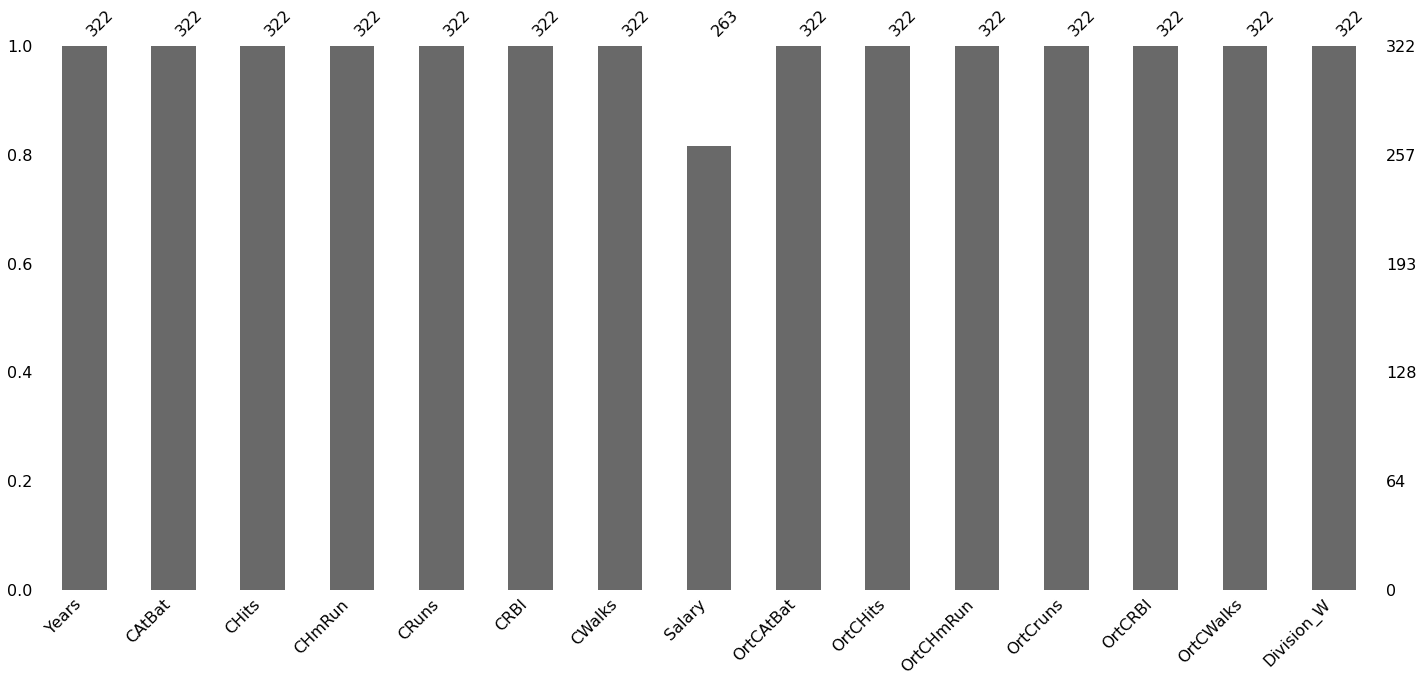

In [47]:
# Eksik gözlemlerin görselleştirilmesi için missingno kütüphanesi kullanılarak eksik gözlemler görselleştirilmiştir.
import missingno as msno
msno.bar(df);

In [48]:
# Salary (Maaş) değişkeninde 59 adet eksik gözlem bulunmakta acaba bu eksik gözlemler kaç yıllık kariyere sahip ve hangi ligde oynamaktalar buna erişim sağlanmıştır.
# Kısaca eksik gözlem olan değerler acaba kaç yıllık kariyer ve hangi ligde oynamaktalar buna erişim sağlandı.
df_eksik = df[df["Salary"].isnull()].head()
df_eksik

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks,Division_W
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0
15,3,201,42,3,20,16,11,NaN,67.000000,14.000000,1.000000,6.666667,5.333333,3.666667,1
18,12,5233,1478,100,643,658,653,NaN,436.083333,123.166667,8.333333,53.583333,54.833333,54.416667,1
22,6,84,26,2,9,9,3,NaN,14.000000,4.333333,0.333333,1.500000,1.500000,0.500000,1
30,17,6890,1833,224,1033,864,1087,NaN,405.294118,107.823529,13.176471,60.764706,50.823529,63.941176,1


### 3.1) Eksik Gözlem Birimlerinin Doldurulması

In [49]:
# Eksik gözlemler KNN Algoritması ile dolduruldu.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df)

In [50]:
# Tekrar sorgulandı eksik değer var mı diye hepsinin KNN algoritması ile doldurulduğu gözlemlendi.
df = pd.DataFrame(df_filled,columns = df.columns)
df.isnull().sum()

Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
Salary        0
OrtCAtBat     0
OrtCHits      0
OrtCHmRun     0
OrtCruns      0
OrtCRBI       0
OrtCWalks     0
Division_W    0
dtype: int64

### 4) Aykırı Gözlem Analizi

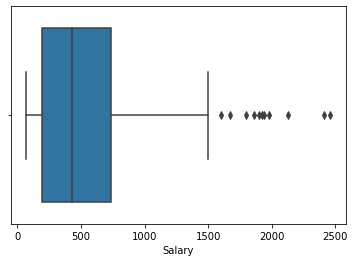

In [51]:
# Salary değişkenini boxplot yöntemi ile görselleştirme işlemi yapılmıştır. Aykırı gözlemlere grafikte rastlamaktayız.
import seaborn as sns
sns.boxplot(x = df["Salary"]);

In [52]:
# Bağımlı değişkenin betimsel istatistiklerine erişim sağlanmıştır.
df["Salary"].describe()

count     322.000000
mean      527.402160
std       428.282887
min        67.500000
25%       190.000000
50%       430.750000
75%       740.000000
max      2460.000000
Name: Salary, dtype: float64

In [53]:
# İlk olarak % 1 lik çeyreklik ve % 99 daki çeyreklikler incelendiğinde aykırı gözleme rastlanmamıştır.
# Daha sonra % 5 lik çeyreklik ve % 95 deki çeyreklikler incelendiğinde aykırı gözleme rastlanmamıştır.
# Son olarak % 25 lik çeyreklik ve % 75 lik çeyreklikler incelendiğinde aykırı gözleme rastlanmıştır.
# Sonuç: 25 ve 75'lik çeyrekliklere göre bağımlı değişkene aykırı gözlem analizi uygulanacktır. İş sektör bilgisi konusunda dokunulmayadabilir.
# Burada 25 ve 75'lik çeyrekliklerde tüm değişkenlerde kaç adet aykırı gözlem var buna erişim sağlanmıştır.

for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Years yes
2
CAtBat yes
5
CHits yes
6
CHmRun yes
32
CRuns yes
5
CRBI yes
26
CWalks yes
20
Salary yes
11
OrtCAtBat no
OrtCHits no
OrtCHmRun yes
6
OrtCruns no
OrtCRBI no
OrtCWalks yes
4
Division_W no


In [54]:
# Salary değişkeni için akırı gözlem analizinde kullanılan IQR derinin hesaplanması ve alt ve üst sınırların belirlenilmesi işlemi gerçekleştirilmiştir.
# Bulunan aykırı gözlemler üst sınır ile baskılanmıştır. Aykırı gözlem analizinde en yaygın olarak baskılama yöntemi kullanılmaktadır. 
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Salary"] > upper,"Salary"] = upper

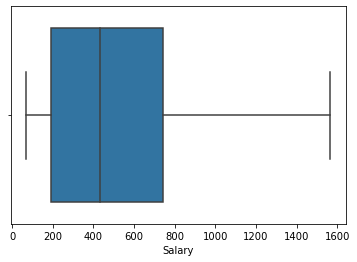

In [55]:
# Aykırı değerler üst sınır ile baskılandırılarak Salary değişkenin boxplot (kutu) grafiği çizdirilerek aykırı değerlerden kurtulduğunu gözlemlemekteyiz.
import seaborn as sns
sns.boxplot(x = df["Salary"]);

### 4.1) Local Outlier Factor Yöntemi ile Aykırı Gözlem Analizi (LOF)

In [56]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 20)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [57]:
# Skor değerleri gelmiştir.
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-6.56220735, -5.14766457, -4.35069729, -3.48856435, -3.47050448,
       -3.40846636, -3.39213388, -2.00187456, -1.9228802 , -1.71751942,
       -1.6841345 , -1.61831991, -1.60607412, -1.58545986, -1.50208784,
       -1.50066937, -1.49737285, -1.49652573, -1.40712201, -1.39826949,
       -1.39480135, -1.39149714, -1.3542251 , -1.33963683, -1.33529675,
       -1.3331065 , -1.32184747, -1.31779825, -1.3169861 , -1.31424581])

In [58]:
# Eşik değeri belirlenilmiştir.
threshold = np.sort(df_scores)[9]
threshold

-1.7175194228638802

In [59]:
# Belirlenen eşik değer veri setine uyarlanarak aykırı gözlemlerden kurtulunmuş olundu.
outlier = df_scores > threshold
df = df[outlier]

In [60]:
# Aykırı değerlerden kurtulduktan sonra veri setimizin boyutu incelenilmiştir.
df.shape

(312, 15)

# 3) Doğrusal Regresyon Modelleri ile Modelleme 

- Basit Doğrusal Regresyon
- Çoklu Doğrusal Regresyon
- Ridge Regresyon
- Lasso Regresyon
- ElasticNet Regresyon

Her bir model tüm veri seti ile modellenebilir ancak du durumun bir dezavantajı bulunmaktadır model daha önce hiç görmediği verilerde kötü sonuçlar üretecektir. Veri setini train ve test şeklinde ayırıp bu şekilde bir model kurulum işlemi gerçekleştirilip alınan hata değerleri gözlemlenecektir. İsterseniz tüm veri ile de modeller kurabilirsiniz.

## 1) Basit Doğrusal Regresyon

In [61]:
# Gerekli import işlemleri gerçekleştirilmiştir.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
# Bağımlı ve Bağımsız değişkenler seçilerek X ve y değişkenlerine atanmıştır. X bağımsız değişkeni standardize edilmiştir.
# Veri setinde yer alan değişkenleri standardizasyon işlemi yapılarak model kurulumunda alınan hataların düşürülmesinde etkili bir faktördür. 
# Birden çok standardizasyon yöntemi bulunmaktadır. Bunlar "Normalize", "MinMax" ve "Scale" gibi yöntemlerdir.
# Test ve Train ayırma işlemi gerçekleştirilmiştir. Train setinin % 20'si test setini oluşturmaktadır. Yani train = % 80 ve test = % 20 olarak ayrılmıştır.
X = df[["OrtCHits"]]
y = df[["Salary"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### 1.1) Model Kurulum

In [63]:
# Train setleri ile basit doğrusal regresyon model kurulum işlemi gerçekleştirilmiştir.
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Basit Doğrusal Regresyonun model denklemi (formülü) yazdırılmıştır.
# İntercept: Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
# Coef: Model denkleminde yer alan b1, b2 ... bp değerleridir.
print("Formül: "+str(reg_model.intercept_)+" "+str(reg_model.coef_)+"x1")

Formül: [508.25579759] [[250.04368222]]x1


### 1.2) Eğitim Hatası

In [65]:
# Model eğitim hatası hesaplanmıştır.
y_pred = reg_model.predict(X_train)
reg_model_basit_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
reg_model_basit_egitim_hata

305.50801973625977

### 1.3) Test Hatası

In [66]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = reg_model.predict(X_test)
reg_model_basit_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
reg_model_basit_test_hata

199.33479501511692

### 1.4) Model Doğrulama - K-Fold CV 

In [67]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
from sklearn.model_selection import cross_val_score
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

Model Doğrulama RMSE Hata Değeri:307.5702326697859


## 2) Çoklu Doğrusal Regresyon

In [68]:
# Gerekli import işlemleri gerçekleştirilmiştir.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
# Bağımlı ve Bağımsız değişkenler belirlenip X ve y değişkenlerine atanmıştır.
# Daha sonra bağımsız değişkenler standardize edilmiştir ancak one hot encoding kısmında oluşan yeni dummy değişkenleri standardize etmemek gerekmektedir.
# Bu nedenle ilk önce bütün bağımsız değişkenler standardize edilip sonrasında dummy değişkenler 1-0 olarak dönüştürülmüştür.
# Standardize işlemi sonucunda dummy değişkenlerde yer alan 0 değerleri negatfi değerlere 1 değerleri pozitif değerlere dönüştürülmüştür.
# Bu nedenle 0'dan küçük olan değerlere 0, büyük olan değerlere 1 değeri bir for döngüsü yazılarak atanmıştır.
y = df["Salary"]
X = df.drop("Salary",axis=1)
X = scaler.fit_transform(X)
for i in range(len(X)):
    if X[i][13]<0:
        X[i][13]=0
    else:
        X[i][13]=1  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [70]:
# Ayrılmış olan veri setinin boyutlarına erişim sağlanmıştır.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(249, 14) (63, 14) (249,) (63,)


### 2.1) Model Kurulum

In [71]:
# Train setleri ile çoklu doğrusal regresyon model kurulum işlemi gerçekleştirilmiştir.
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
reg_model.intercept_

540.8147190244803

In [73]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
reg_model.coef_

array([  74.8093756 , -175.03632957, -296.9222592 ,  -21.23625085,
        625.40993564,   83.93366566, -154.25248501, -314.62554981,
        567.28992276,   46.77623013, -219.8671064 ,    2.16387392,
        121.23948802,  -70.55563517])

### 2.2) Eğitim Hatası

In [74]:
# Model eğitim hatası hesaplanmıştır.
y_pred = reg_model.predict(X_train)
reg_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
reg_model_egitim_hata

242.23277533668204

### 2.3) Test Hatası

In [75]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = reg_model.predict(X_test)
reg_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
reg_model_test_hata

183.46682748847505

### 2.4) Model Doğrulama - K-Fold CV 

In [76]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
from sklearn.model_selection import cross_val_score
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

Model Doğrulama RMSE Hata Değeri:263.14224262610526


## 3) Ridge Regresyon

In [77]:
# Gerekli import işlemleri yapılmıştır.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### 3.1) Model Kurulum

In [78]:
# Train setleri ile ridge regresyon model kurulum işlemi gerçekleştirilmiştir.
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [79]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
ridge_model.intercept_

541.5560825114876

In [80]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
ridge_model.coef_

array([  54.24754018, -162.11867482,   48.21645672,   71.89180512,
        294.9005973 ,  -69.83130998,  -82.41572932, -278.11121771,
        355.2194913 ,  -16.63123642,  -51.13878496,   91.53362313,
         81.68820653,  -73.07711113])

### 3.2) Eğitim Hatası

In [81]:
# Model eğitim hatası hesaplanmıştır.
y_pred = ridge_model.predict(X_train)
ridge_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
ridge_model_egitim_hata

243.55922491050313

### 3.3) Test Hatası

In [82]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = ridge_model.predict(X_test)
ridge_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_model_test_hata

184.04577735421122

### 3.4) Model Doğrulama - K-Fold CV

In [83]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
from sklearn.model_selection import cross_val_score
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

Model Doğrulama RMSE Hata Değeri:259.4881504974487


### 3.5) Model Hiperparametre Optimizasyonu

In [84]:
# Kurulmuş olunan modelin hiperparametre değerlerine erişim sağlanmıştır. 
# Hiperparametre optimizasyonunda alpha değerinin en uygun değeri bulunarak final modeli kurulacaktır.
ridge_model

Ridge()

In [85]:
# Bazı alpha setleri hazırlanılmıştır. Model için denenip en uygunu seçilecektir.
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]
alphas5 = np.arange(100,10000,10) 

In [86]:
# Belli alpha setleri denenerek final modeli için en uygun alpha değeri belirlenecektir. Cross Validation için RidgeCV fonk. Kullanılmaktadır.
ridge_cv = RidgeCV(alphas = alphas3, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [87]:
# Final modeli için en uygun alpha değeri seçilmiştir.
ridge_cv.alpha_

0.005005005005005005

In [88]:
# Alpha değeri değişkene atanmıştır. Karşılaştırma dataframene eklemek için. 
ridge_alpha = ridge_cv.alpha_

### 3.6) Hiperparametre Optimizasyonu sonrasında Final Model Kurulumu (Model Tuning)

In [89]:
# Belirlenen alpha değerine göre final modeli kururlmuştur.
ridge_tuned = Ridge(alpha = ridge_cv.alpha_)
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=0.005005005005005005)

### 3.7) Final Model Test Hatası

In [90]:
y_pred = ridge_tuned.predict(X_test)
ridge_final_hata = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_final_hata

183.45696108934007

## 4) Lasso Regresyon

In [91]:
# Gerekli import işlemleri gerçekleştirilmiştir.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### 4.1) Model Kurulum

In [92]:
# Train setleri ile lasso regresyon model kurulum işlemi gerçekleştirilmiştir.
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [93]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
lasso_model.intercept_

540.8378322342253

In [94]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
lasso_model.coef_

array([  34.02462811,  -87.03319124,   -0.        ,   36.24439389,
        228.8311611 ,   -0.        ,  -55.04577573, -326.1514941 ,
        387.26881295,    0.        ,  -11.10782921,   62.83264322,
         65.59750522,  -71.69281394])

### 4.2) Eğitim Hatası

In [95]:
# Model eğitim hatası hesaplanmıştır.
y_pred = lasso_model.predict(X_train)
lasso_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
lasso_model_egitim_hata

244.2926611468897

### 4.3) Test Hatası

In [96]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = lasso_model.predict(X_test)
lasso_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_model_test_hata

186.99736011981014

### 4.4) Model Doğrulama - K-Fold CV

In [97]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
print("Model Doğrulama Hatası:" + str(np.sqrt(np.mean(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

Model Doğrulama Hatası:259.9764808122278


### 4.5) Model Hiperparametre Optimizasyonu

In [98]:
# Kurulmuş olunan modelin hiperparametre değerlerine erişim sağlanmıştır. 
# Hiperparametre optimizasyonunda alpha değerinin en uygun değeri bulunarak final modeli kurulacaktır.
lasso_model

Lasso()

In [99]:
# Bazı alpha setleri belirlenilmiştir.
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alphas5 = np.arange(100,10000,10) 

In [100]:
# Belli alpha setleri denenerek final modeli için en uygun alpha değeri belirlenecektir. Cross Validation için LassoCV fonk. Kullanılmaktadır.
lasso_cv = LassoCV(alphas = alphas3, cv = 10)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10)

In [101]:
# Final modeli için gerekli olan alpha belirlenilmiştir.
lasso_cv.alpha_

1.0

In [102]:
# Alpha değeri değişkene atanmıştır. Karşılaştırma dataframene eklemek için. 
lasso_alpha = lasso_cv.alpha_

### 4.6) Hiperparametre Optimizasyonu sonrasında Final Model Kurulumu (Model Tuning)

In [103]:
# Belirlenen alpha değeri ile final modeli kurulum işlemi gerçekleştirilmiştir.
lasso_tuned = Lasso(alpha = lasso_cv.alpha_)
lasso_tuned.fit(X_train, y_train)

Lasso()

### 4.7) Final Modeli Test Hatası

In [104]:
# Final Modeli Test Hatası
y_pred = lasso_tuned.predict(X_test)
lasso_final_hata = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_final_hata

186.99736011981014

## 5) ElasticNet Regresyon

In [105]:
# Gerekli import işlemleri gerçekleştirilmiştir.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### 5.1) Model Kurulum

In [106]:
# ElasticNet Model kurulum işlemleri gerçekleştirilmiştir.
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)

ElasticNet()

In [107]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
enet_model.intercept_

522.5645571930195

In [108]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
enet_model.coef_

array([ 17.1065229 ,  17.10886879,  32.11395115,  22.59747031,
        37.53662701,  25.84971294,  13.9282492 ,   7.55859356,
        41.8910954 ,  14.23594283,  34.35565384,  33.30462076,
        25.13862855, -33.33576445])

### 5.2) Eğitim Hatası

In [109]:
# Eğitim Hatası
y_pred = enet_model.predict(X_train)
enet_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
enet_model_egitim_hata

263.3465526580905

### 5.3) Test Hatası

In [110]:
# Test Hatası
y_pred = enet_model.predict(X_test)
enet_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
enet_model_test_hata

186.2553747469711

### 5.4) Model Doğrulama - K-Fold CV

In [111]:
# Model doğrulama işlemi gerçekleştirilmiştir.
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(enet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

Model Doğrulama RMSE Hata Değeri:269.7061255415075


### 5.5) Model Hiperparametre Optimizasyonu

In [112]:
enet_model

ElasticNet()

In [113]:
# Parametre değerleri belirlenmiştir.
enet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
              "alpha": np.linspace(0,1,1000)}

In [114]:
# Belirlenen parametrelere göre final modeli kurulacaktır.
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X_train, y_train)

In [115]:
# En iyi parametreler belirlenilmiştir.
gs_cv_enet.best_params_

{'alpha': 0.004004004004004004, 'l1_ratio': 0.1}

In [116]:
# Alpha değeri değişkene atanmıştır. Karşılaştırma dataframene eklemek için. 
enet_alpha = 0.004004004004004004

### 5.6) Hiperparametre Optimizasyonu sonrasında Final Model Kurulumu (Model Tuning)

In [117]:
# Belirlenen parametrelere göre final modeli kurulumu yapılmıştır.
enet_tuned = ElasticNet(**gs_cv_enet.best_params_)
enet_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.004004004004004004, l1_ratio=0.1)

### 5.7) Final Modeli Test Hatası

In [118]:
# Final Model Hatası
y_pred = enet_tuned.predict(X_test)
enet_final_hata = np.sqrt(mean_squared_error(y_test, y_pred))
enet_final_hata

183.97624058797436

# 4) Tüm Modellerin Karşılaştırılması

In [119]:
# Modellerin karşılaştırılması yapılmıştır. 
modeller = [
    reg_model,
    ridge_tuned,
    lasso_tuned,
    enet_tuned,]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("Hata:" + str(hata))

----------------------------
LinearRegression:
Hata:183.46682748847505
----------------------------
Ridge:
Hata:183.45696108934007
----------------------------
Lasso:
Hata:186.99736011981014
----------------------------
ElasticNet:
Hata:183.97624058797436


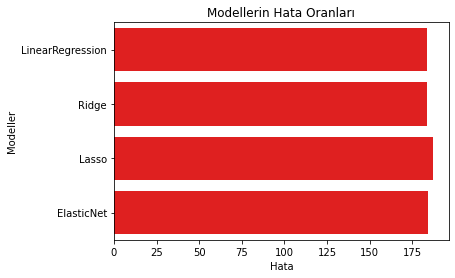

In [120]:
# Elde edilen hatalar görselleştirildi.
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Hata"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))    
    sonuc = pd.DataFrame([[isimler, hata]], columns= ["Modeller","Hata"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Hata', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Hata')
plt.title('Modellerin Hata Oranları');  

In [121]:
# Elde edilen sonuçlar dataframe olarak kaydedildi.
sonuclar_df = pd.DataFrame({"Eğitim Hatası":[reg_model_basit_egitim_hata, reg_model_egitim_hata, ridge_model_egitim_hata, lasso_model_egitim_hata, enet_model_egitim_hata],
                              "Test Hatası":[reg_model_basit_test_hata, reg_model_test_hata, ridge_model_test_hata, lasso_model_test_hata, enet_model_test_hata],                              
                              "Test Tuned Hatası":["Yoktur","Yoktur",ridge_final_hata, lasso_final_hata,enet_final_hata],
                               "Alpha Değerleri": ["Yoktur", "Yoktur", ridge_alpha,lasso_alpha, enet_alpha]})
sonuclar_df.index= ["BASİT_LR_DETAY", "COKLU_LR_DETAY","RIDGE_DETAY","LASSO_DETAY","ENET_DETAY"]

In [122]:
# Sonuçlar incelendi.
sonuclar_df

,Eğitim Hatası,Test Hatası,Test Tuned Hatası,Alpha Değerleri
BASİT_LR_DETAY,305.508020,199.334795,Yoktur,Yoktur
COKLU_LR_DETAY,242.232775,183.466827,Yoktur,Yoktur
RIDGE_DETAY,243.559225,184.045777,183.457,0.00500501
LASSO_DETAY,244.292661,186.997360,186.997,1
ENET_DETAY,263.346553,186.255375,183.976,0.004004
